![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.1.1
bikes.groupby('season').total.max()

season
1    801
2    873
3    977
4    948
Name: total, dtype: int64

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

**Respuesta**

Las variables _season_ y _hour_ en este caso son atributos que indican la temporada (estación del año) y la hora del día en que fue rentada una bicileta. De acuerdo a la media de alquileres por temporada, se puede observar que la renta de bicicletas es mayor en aquellas epocas soleadas del año, y empieza a disminuir a medida de que disminuye la temperatura. La cantidad máxima de rentas por temporada tiene el mismo comportamiento que la media.

En cuanto a las horas del día, se evidencia una tendencia incremental en las "horas pico" del día. Se puede observar como entre las horas 5 y 8 existe un incremento significativo en la media de alquileres de bicicletas y como se sostiene un poco durante el horario de 9 a 15. A partir de la hora 16  hasta la hora 18 se evidencian los picos mas altos. Este comportamiento podría relacionarse con el horario laboral de la población ya que los picos mas altos se presentan en las horas en que las personas se desplazan a sus trabajos y nuevamente a sus casas.

Por último, se destaca que la población hace mayor uso del servicio en las "horas pico" de la tarde, lo que podría indicar que las personas tienen mayor dificultad para desplazarse al terminar la jornada laboral, por lo cual prefieren hacer uso de las bicicletas.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

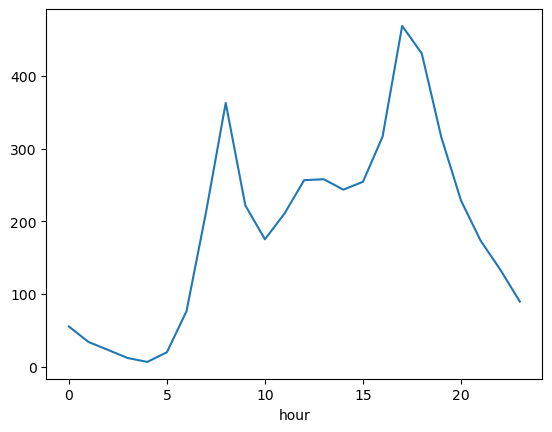

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

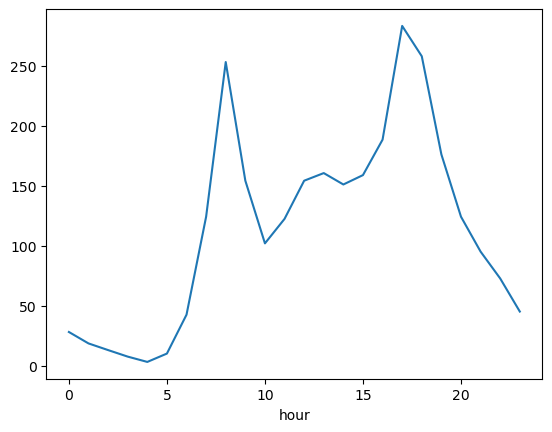

In [8]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos

def agrupar_filtro(df, columna, valor_filtro):
    filtro = df[columna] == valor_filtro
    df_filtrado = df[filtro]
    df_agrupado = df_filtrado.groupby('hour').total.mean()
    return df_agrupado.plot()

agrupar_filtro(bikes, 'season', 1)

<Axes: xlabel='hour'>

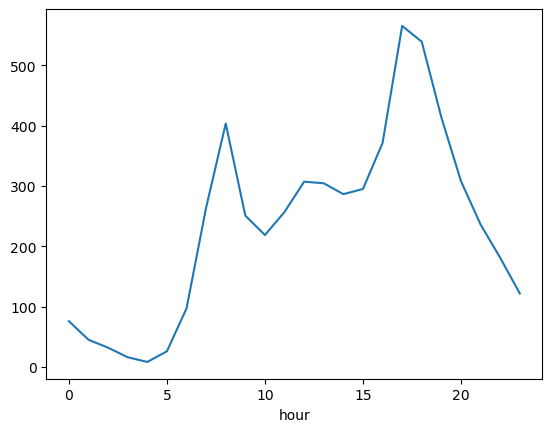

In [9]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
agrupar_filtro(bikes, 'season', 3)

**Respuesta**

Se puede observar que el comportamiento de la media de alquileres de bicicletas para las estaciones __1 = invierno__ y __3 = verano__ es similar al comportamiento general de todas las estaciones ya que se evidencia que se producen picos a las mismas horas del día. Sin embargo, se tiene mayor dispersión en los resultados de la estación "verano" ya que es la epoca donde se hace mayor uso del servicio.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [10]:
# Celda 3

var_x = ['season', 'hour']
var_y = ['total']

XTotal = bikes[var_x]
yTotal = bikes[var_y]

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

modelo_LR = LinearRegression()
modelo_LR.fit(XTrain, yTrain)

print("Coeficientes del modelo de regresión lineal:")
print(modelo_LR.coef_)

Coeficientes del modelo de regresión lineal:
[[28.03619568 10.57944293]]


In [11]:
predicciones_modelo_LR = modelo_LR.predict(XTest)
MSE_modelo_LR=np.average(np.square(predicciones_modelo_LR-yTest))
print('MSE Regresión Lineal:')
print(MSE_modelo_LR)

MSE Regresión Lineal:
26895.620157285255


**Respuesta 3**

La interpretación de los coeficientes del modelo en este caso es un poco confusa. El resultado de los Betas se suele interpretar como la variación que tiene la variable dependiente (en este caso la renta de bicicletas) dado un cambio en una unidad en las variables independientes (hour y season), pero en este caso no es válida la interpretación ya que las variables independientes son variables categoricas que el modelo interpreta como enteras. 

Para este caso un modelo de regresión lineal, ademas de tener limitaciones en cuanto a la interpretación de los resultados, tiene otras desventajas como que no se tiene en cuenta la correlación existente entre las observaciones, ya que como se evidenció anteriormente una hora específica del día y una temporada influyen directamente en la variable de respuesta. Además, este modelo asume una relación líneal entre las variables independientes y la variable de respuesta, que en este caso podría no ser la más adecuada.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [12]:
# Celda 4


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Text(0, 0.5, 'MSE')

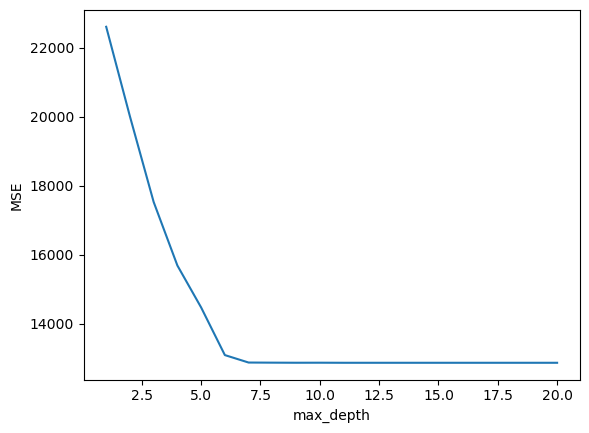

In [13]:
# Celda 5

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
mse_scores = []

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeRegressor de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    #r2_scores.append(cross_val_score(clf, XTrain, yTrain, cv=10, scoring='r2').mean())
    mse = -cross_val_score(clf, XTrain, yTrain, cv=10, scoring='neg_mean_squared_error').mean()
    mse_scores.append(mse)

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [14]:
yTest_RgTree = np.array(yTest).reshape(-1)

In [15]:
RgTree = DecisionTreeRegressor(max_depth=7, random_state=1)
RgTree.fit(XTrain, yTrain)

predicciones_RgTree = RgTree.predict(XTest)
MSERgTree=np.average(np.square(predicciones_RgTree-yTest_RgTree))
print('MSE arbol de regresión:')
print(MSERgTree)

MSE arbol de regresión:
13445.850862811936


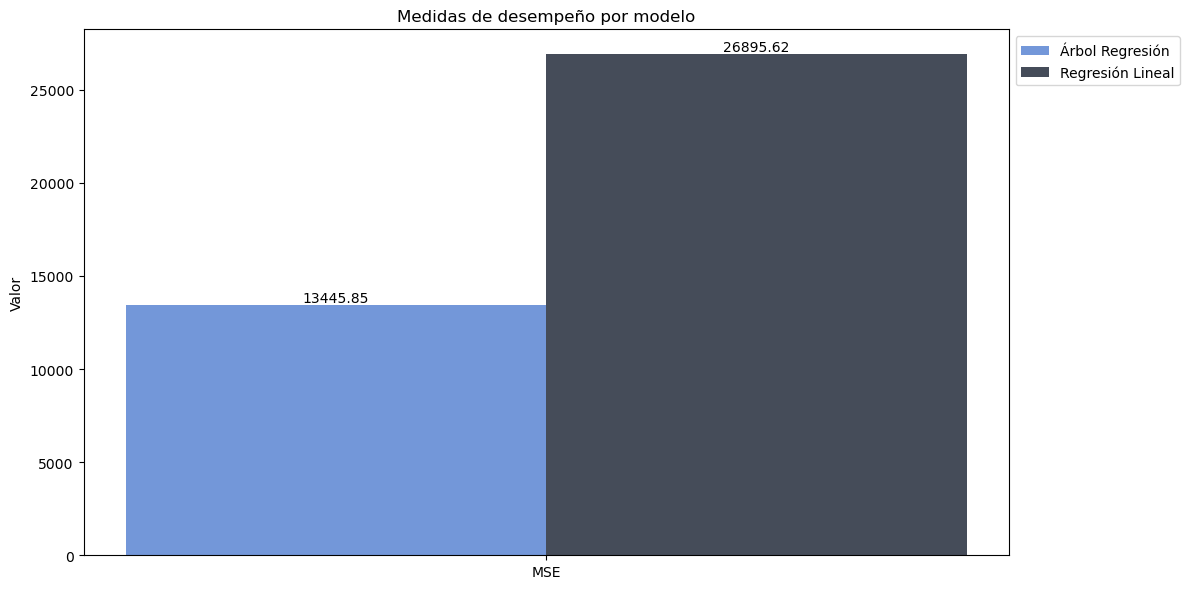

In [16]:
# Se definen las medidas y los modelos
medidas = ['MSE']
modelos = {
    'Árbol Regresión': [MSERgTree],
    'Regresión Lineal': [MSE_modelo_LR],
}

# Formato de colores para las barras
colores_modelos = ['#7397D9', '#454C59']

# Configuración de las dimensiones de figura
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.185
index = np.arange(len(medidas))

# Graficamos las barras con el valor obtenido en cada modelo para las medidas, redondeado a 2 cifras decimales las etiquetas
for i, (nombre_modelo, valores) in enumerate(modelos.items()):
    etiquetas = [f'{round(valor, 2):.2f}' for valor in valores]  # Redondear valores a 2 decimales y convertir a cadena
    ax.bar(index + i * bar_width, valores, bar_width, label=nombre_modelo, color=colores_modelos[i % len(colores_modelos)])
    for j, etiqueta in enumerate(etiquetas):
        ax.text(index[j] + i * bar_width, valores[j] + 0.01, etiqueta, ha='center', va='bottom')

# Ajustes de la figura
ax.set_xlabel('')
ax.set_ylabel('Valor')
ax.set_title('Medidas de desempeño por modelo')
ax.set_xticks(index + (len(modelos) - 1) * bar_width / 2)
ax.set_xticklabels(medidas)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Respuesta punto 5**

Inicialmente se determinó la profundidad máxima del arbol buscando minimizar el MSE, del análisis gráfico se obtiene una profundidad de 7. Posteriormente se entrena el modelo y se compara el MSE obtenido con el MSE obtenido en el punto 3 para el modelo de regresión lineal. Se evidencia una mejora significativa frente al modelo Lineal, ya que por las caracteristicas de las variables predictoras, se modela mejor la relación con la variable dependiente en un arbol de desición.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [17]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [18]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [19]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

Text(0, 0.5, 'Accuracy')

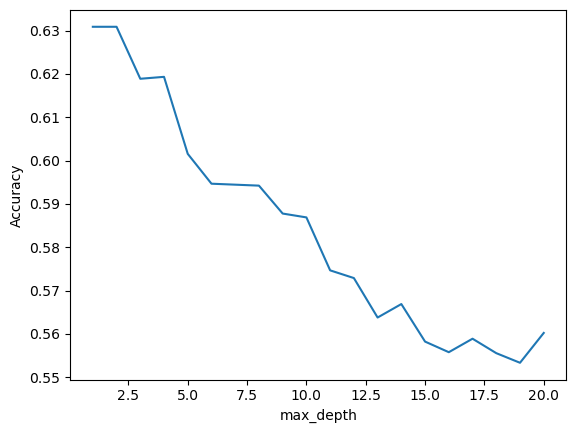

In [20]:
# Celda 6

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf_6 = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf_6, X_train, y_train, cv=10, scoring='accuracy').mean())

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [21]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [22]:
# Entrenamiento del modelo de arbol de decisión, predicción y cálculo del MSE

clfTree = DecisionTreeClassifier(max_depth=2, random_state=1)
clfTree.fit(X_train, y_train)

predicciones_clfTree = clfTree.predict(X_test)
accuracyclfTree=accuracy_score(y_true=y_test, y_pred=predicciones_clfTree)
f1_clfTree = f1_score(y_test, predicciones_clfTree)
print(accuracyclfTree, f1_clfTree)

0.6453333333333333 0.6448598130841121


In [23]:
# Entrenamiento del modelo de regresión logística, predicción y cálculo del MSE

clfRegLog= LogisticRegression(random_state=1,max_iter=10000)
clfRegLog.fit(X_train,y_train)

predicciones_clfRegLog = clfRegLog.predict(X_test)
accuracyclfRegLog=accuracy_score(y_true=y_test, y_pred=predicciones_clfRegLog)
f1_clfRegLog = f1_score(y_test, predicciones_clfRegLog)
print(accuracyclfRegLog, f1_clfRegLog)

0.624 0.6050420168067226


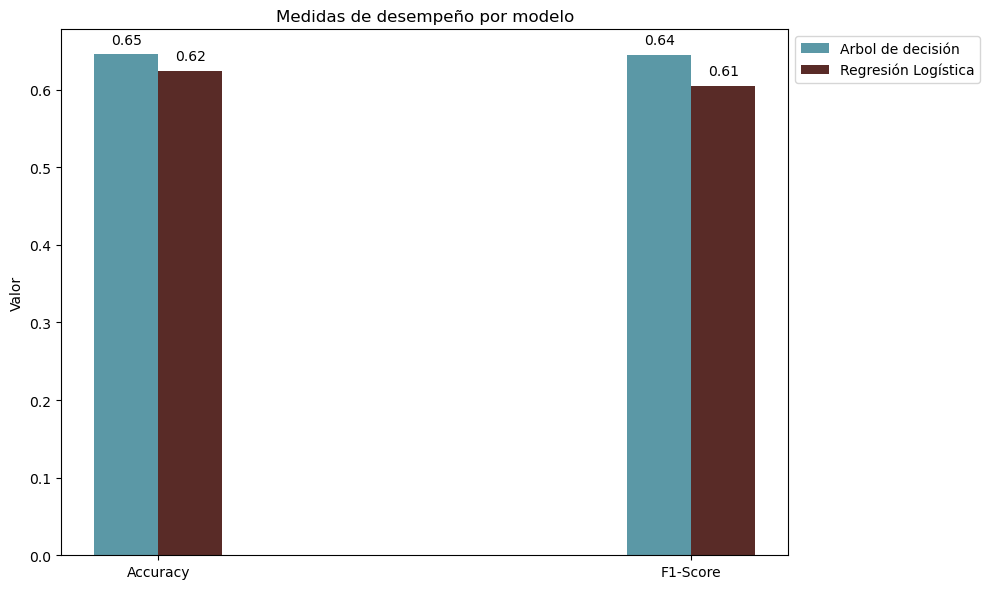

In [24]:
# Comparar las evaluaciones de poder predictivo de los diferentes modelos
medidas = ['Accuracy', 'F1-Score']
modelos = {
    'Arbol de decisión':[accuracyclfTree, f1_clfTree],
    'Regresión Logística':[accuracyclfRegLog, f1_clfRegLog]
}

# Formato de colores para las barras
colores_modelos = ['#5B98A6','#592B27']

# Configuración de las dimensiones de figura
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.12
index = np.arange(len(medidas))

# Graficamos las barras con el valor obtenido en cada modelo para las medidas, redondeado a 2 cifras decimales las etiquetas
for i, (nombre_modelo, valores) in enumerate(modelos.items()):
    etiquetas = [f'{round(valor, 2):.2f}' for valor in valores]  # Redondear valores a 2 decimales y convertir a cadena
    ax.bar(index + i * bar_width, valores, bar_width, label=nombre_modelo, color=colores_modelos[i % len(colores_modelos)])
    for j, etiqueta in enumerate(etiquetas):
        ax.text(index[j] + i * bar_width, valores[j] + 0.01, etiqueta, ha='center', va='bottom')

# Ajustes de la figura
ax.set_xlabel('')
ax.set_ylabel('Valor')
ax.set_title('Medidas de desempeño por modelo')
ax.set_xticks(index + (len(modelos) - 1) * bar_width / 2)
ax.set_xticklabels(medidas)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Respuesta 6**

En este punto se calibró nuevamente el parámetro _max_depth_ de modo que se maximizara el _accuracy_ para el modelo de arbol de decisión. En la gráfica se puede observar que nuevamente el modelo con mejor capacidad predictiva, es decir, el modelo que clasifica mejor las observaciones de la muestra _X_test_ es el árbol de decisión.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [25]:
# Celda 7
from sklearn import metrics

# Creación de 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees_max_depth = {}
trees_min_samples_leaf = {}
logistic_regressions = {}

for i in range(n_estimators):
    trees_max_depth[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=2, random_state=seeds[i])
    trees_max_depth[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
    trees_min_samples_leaf[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=10, max_depth=None, random_state=seeds[i])
    trees_min_samples_leaf[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

    logistic_regressions[i] = LogisticRegression(random_state=seeds[i],max_iter=100)
    logistic_regressions[i].fit(X_train.iloc[samples[i]],y_train.iloc[samples[i]])


# Predicción para los datos del set de test con cada modelo
y_pred_trees_max_depth = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
y_pred_trees_min_samples_leaf = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
y_pred_logistic_regressions = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))

for i in range(n_estimators):
    y_pred_trees_max_depth.iloc[:, i] = trees_max_depth[i].predict(X_test)
    y_pred_trees_min_samples_leaf.iloc[:, i] = trees_min_samples_leaf[i].predict(X_test)
    y_pred_logistic_regressions.iloc[:, i] = logistic_regressions[i].predict(X_test)

result_concatenated = pd.concat([y_pred_trees_max_depth, y_pred_trees_min_samples_leaf, y_pred_logistic_regressions], axis=1)

# Votación mayoritaria
y_pred1 = (y_pred_trees_max_depth.sum(axis=1) >= (n_estimators / 2)).astype(np.int64)
acc_1 = metrics.accuracy_score(y_pred1, y_test)
f1_1 = metrics.f1_score(y_pred1, y_test)

y_pred2 = (y_pred_trees_min_samples_leaf.sum(axis=1) >= (n_estimators / 2)).astype(np.int64)
acc_2 = metrics.accuracy_score(y_pred2, y_test)
f1_2 = metrics.f1_score(y_pred2, y_test)

y_pred3 = (y_pred_logistic_regressions.sum(axis=1) >= (n_estimators / 2)).astype(np.int64)
acc_3 = metrics.accuracy_score(y_pred3, y_test)
f1_3 = metrics.f1_score(y_pred3, y_test)

y_pred4 = (result_concatenated.sum(axis=1) >= (n_estimators / 2)).astype(np.int64)
acc_4 = metrics.accuracy_score(y_pred4, y_test)
f1_4 = metrics.f1_score(y_pred4, y_test)


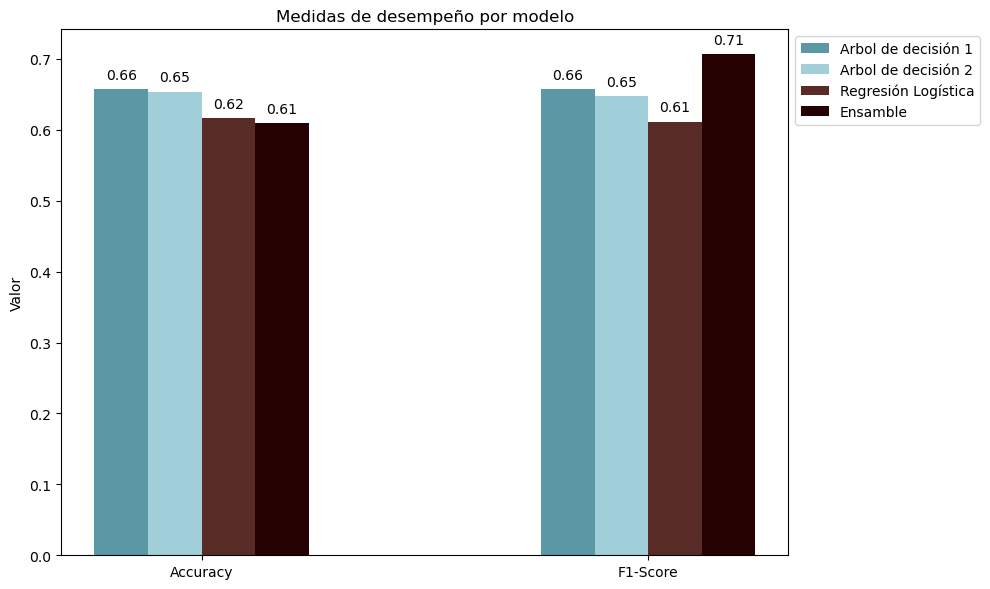

In [26]:
# Comparar las evaluaciones de poder predictivo de los diferentes modelos
medidas = ['Accuracy', 'F1-Score']
modelos = {
    'Arbol de decisión 1':[acc_1, f1_1],
    'Arbol de decisión 2':[acc_2, f1_2],
    'Regresión Logística':[acc_3, f1_3],
    'Ensamble':[acc_4, f1_4]
}

# Formato de colores para las barras
colores_modelos = ['#5B98A6', '#A0CED9', '#592B27', '#260101']

# Configuración de las dimensiones de figura
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.12
index = np.arange(len(medidas))

# Graficamos las barras con el valor obtenido en cada modelo para las medidas, redondeado a 2 cifras decimales las etiquetas
for i, (nombre_modelo, valores) in enumerate(modelos.items()):
    etiquetas = [f'{round(valor, 2):.2f}' for valor in valores]  # Redondear valores a 2 decimales y convertir a cadena
    ax.bar(index + i * bar_width, valores, bar_width, label=nombre_modelo, color=colores_modelos[i % len(colores_modelos)])
    for j, etiqueta in enumerate(etiquetas):
        ax.text(index[j] + i * bar_width, valores[j] + 0.01, etiqueta, ha='center', va='bottom')

# Ajustes de la figura
ax.set_xlabel('')
ax.set_ylabel('Valor')
ax.set_title('Medidas de desempeño por modelo')
ax.set_xticks(index + (len(modelos) - 1) * bar_width / 2)
ax.set_xticklabels(medidas)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Respuesta 8**

Se estimaron por separado 3 grupos de 100 modelos con las siguientes caracteristicas:

1. Modelo de arbol de decisión con parámetro _max_depth = 2_, al igual que en el punto anterior
2. Modelo de arbol de decisión con parámetro _min_samples_leaf = 10_
3. Modelo de regresión logística con parámetro _max_iter = 100_

Posteriormente se realiza el ensamble a través de votación mayoritaria donde finalmente con el ensablaje obtiene el mejor resultado en cuanto al F1-Score. El modelo de arbol de desición 1 (parámetro _max_depth = 2_) tiene el mejor accuracy, sin embargo no presenta una diferencia tan considerable con respecto a los otros modelos. Por lo tanto el mejor modelo es el ensamble

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [27]:
# Celda 8

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors1 = np.zeros(n_estimators)
errors2 = np.zeros(n_estimators)
errors3 = np.zeros(n_estimators)
errors4 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred1 = trees_max_depth[i].predict(X_train.iloc[samples_oob[i]])
    errors1[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred1)

    y_pred2 = trees_min_samples_leaf[i].predict(X_train.iloc[samples_oob[i]])
    errors2[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred2)

    y_pred3 = logistic_regressions[i].predict(X_train.iloc[samples_oob[i]])
    errors3[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred3)

alpha1 = (1 - errors1) / (1 - errors1).sum()
alpha2 = (1 - errors2) / (1 - errors2).sum()
alpha3 = (1 - errors3) / (1 - errors3).sum()

weighted_sum_1 = ((y_pred1) * alpha1).sum(axis=1)
weighted_sum_2 = ((y_pred2) * alpha2).sum(axis=1)
weighted_sum_3 = ((y_pred3) * alpha3).sum(axis=1)

result_concatenated2 = pd.concat([weighted_sum_1, weighted_sum_2, weighted_sum_3], axis=0)

# Desempeño al hacer votación ponderada
y_pred_total = (result_concatenated2 >= 0.5).astype(np.int64)
metrics.f1_score(y_pred_total, y_test), metrics.accuracy_score(y_pred_total, y_test)

ValueError: operands could not be broadcast together with shapes (1653,) (100,) 

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9